In [ ]:
"""
Tarea 2
Geofísica Matemática y Computacional 
Alumna: Natalia Denise Fuentes Rubio
"""

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')

In [2]:
params = {'figure.figsize' : (10,5),
#          'text.usetex'    : True,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.labelsize' : 20,
          'axes.titlesize' : 20,
          'legend.fontsize': 15,
          'lines.linewidth'     : 3}

plt.rcParams.update(params)

In [3]:
def forwardFD(u,x,h):
    """ 
    Esquema de diferencias finitas hacia adelante.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica hacia adelante.
    """
    return (u(x+h)-u(x))/h

In [4]:
# Definimos un arreglo con diferentes tamaños de h:
N = 6
h = np.zeros(N)

h[0] = 1.0
for i in range(1,N):
    h[i] = h[i-1] * 0.5

# Definimos un arreglo con valores de 1.0 (donde evaluaremos el cos(x)):
x = np.ones(N)

print(h)
print(x)

[1.      0.5     0.25    0.125   0.0625  0.03125]
[1. 1. 1. 1. 1. 1.]


In [5]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
ef = np.fabs( np.cos(x) - forwardFD(np.sin,x,h) )

# Colocamos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h, ef]).transpose(), 
                     columns=['$h$','$D_+$'])
Error

,$h$,$D_+$
0,1.00000,0.472476
1,0.50000,0.228254
2,0.25000,0.110248
3,0.12500,0.053929
4,0.06250,0.026639
5,0.03125,0.013235


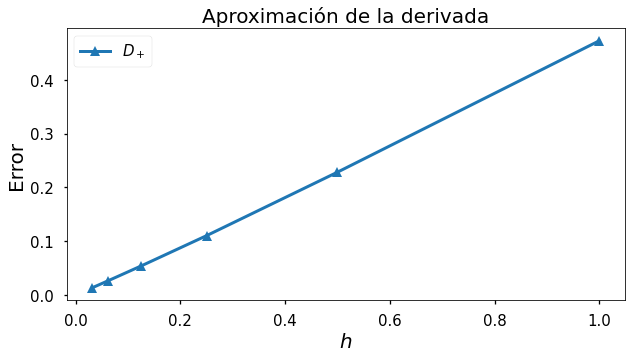

In [6]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.show()

In [7]:
def backwardFD(u,x,h):
    return (u(x)-u(x-h))/h

In [8]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
eb = np.fabs( np.cos(x) - backwardFD(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h, ef, eb]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$'])
Error

,$h$,$D_+$,$D_-$
0,1.00000,0.472476,0.301169
1,0.50000,0.228254,0.183789
2,0.25000,0.110248,0.099027
3,0.12500,0.053929,0.051118
4,0.06250,0.026639,0.025936
5,0.03125,0.013235,0.013059


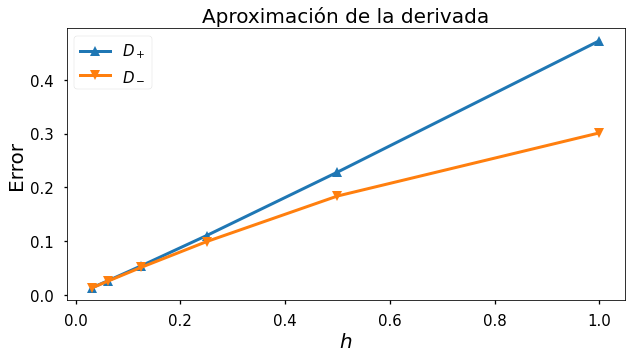

In [9]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.show()

In [10]:
def centeredFD(u,x,h):
    return (u(x+h)-u(x-h))/(2*h)

In [11]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
ec = np.fabs( np.cos(x) - centeredFD(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h,ef,eb,ec]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$'])
Error

,$h$,$D_+$,$D_-$,$D_0$
0,1.00000,0.472476,0.301169,0.085654
1,0.50000,0.228254,0.183789,0.022233
2,0.25000,0.110248,0.099027,0.005611
3,0.12500,0.053929,0.051118,0.001406
4,0.06250,0.026639,0.025936,0.000352
5,0.03125,0.013235,0.013059,0.000088


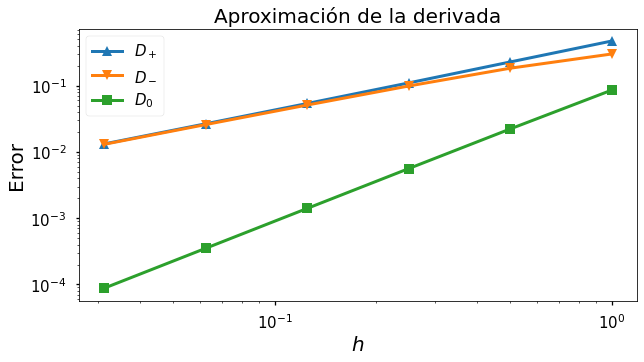

In [12]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()

In [13]:
# Implementación de D3
def D3(u,x,h):
    return ((2*u(x+h)) + 3*u(x) - 6*u(x-h) + u(x-(2*h)))/(6*h)

In [14]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
ed = np.fabs( np.cos(x) - D3(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h,ef,eb,ec,ed]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$','$D_3$'])
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_3$
0,1.00000,0.472476,0.301169,0.085654,0.043287
1,0.50000,0.228254,0.183789,0.022233,0.007314
2,0.25000,0.110248,0.099027,0.005611,0.001014
3,0.12500,0.053929,0.051118,0.001406,0.000132
4,0.06250,0.026639,0.025936,0.000352,0.000017
5,0.03125,0.013235,0.013059,0.000088,0.000002


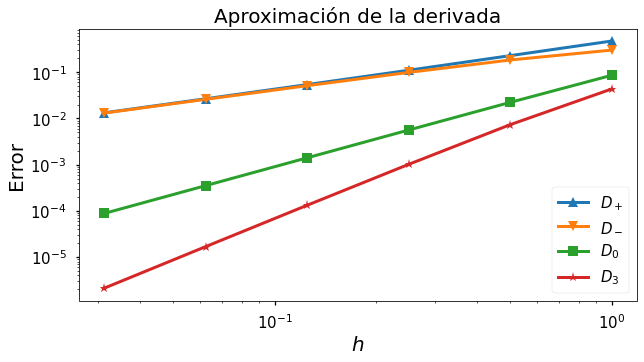

In [15]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.plot(h, ed, '*-', label='$D_3$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()

In [16]:
def D4(u,x,h):
    return (3*u(x) - 4*u(x-h) +u(x-(2*h))) / (2*h)

In [17]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
eg = np.fabs( np.cos(x) - D4(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h,ef,eb,ec,ed, eg]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$','$D_3$','$D_4$'])
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_3$,$D_4$
0,1.00000,0.472476,0.301169,0.085654,0.043287,0.301169
1,0.50000,0.228254,0.183789,0.022233,0.007314,0.066408
2,0.25000,0.110248,0.099027,0.005611,0.001014,0.014265
3,0.12500,0.053929,0.051118,0.001406,0.000132,0.003209
4,0.06250,0.026639,0.025936,0.000352,0.000017,0.000754
5,0.03125,0.013235,0.013059,0.000088,0.000002,0.000182


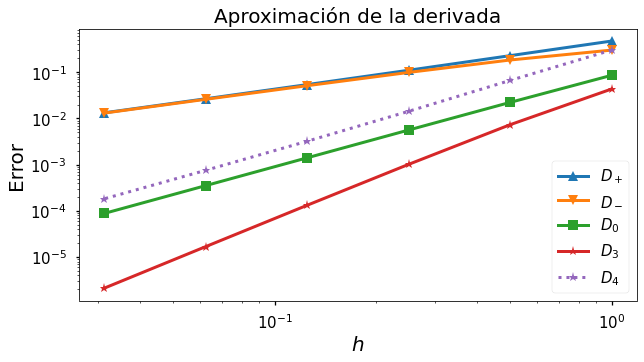

In [18]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.plot(h, ed, '*-', label='$D_3$')
plt.plot(h, eg, '*:', label='$D_4$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()

Ejercico 2 de 01_DerivadasNumericas

In [19]:
a = -3 /(2*h)
b = 2 / h
c = -1 / (2*h)

In [20]:
def D_max (u,x,h):
    return ((a*(x)) + b*(x+h) + c*(x+(2*h))) 

In [21]:
edmax = np.fabs( np.cos(x) - D_max(np.sin,x,h) )

Error = pd.DataFrame(np.array([h,ef,eb,ec,ed, eg, edmax]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$','$D_3$','$D_4$', '$D_1$'])
Error  

,$h$,$D_+$,$D_-$,$D_0$,$D_3$,$D_4$,$D_1$
0,1.00000,0.472476,0.301169,0.085654,0.043287,0.301169,0.459698
1,0.50000,0.228254,0.183789,0.022233,0.007314,0.066408,0.459698
2,0.25000,0.110248,0.099027,0.005611,0.001014,0.014265,0.459698
3,0.12500,0.053929,0.051118,0.001406,0.000132,0.003209,0.459698
4,0.06250,0.026639,0.025936,0.000352,0.000017,0.000754,0.459698
5,0.03125,0.013235,0.013059,0.000088,0.000002,0.000182,0.459698


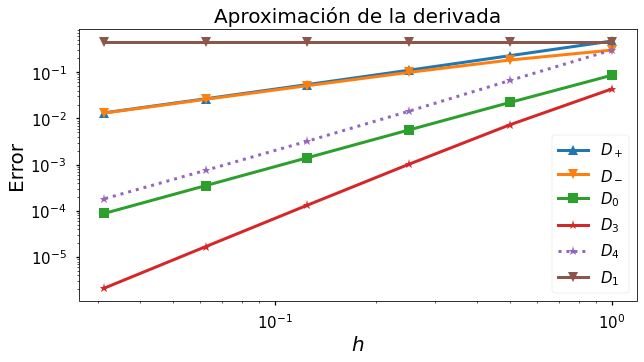

In [22]:
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.plot(h, ed, '*-', label='$D_3$')
plt.plot(h, eg, '*:', label='$D_4$')
plt.plot(h, edmax,'v-', label='$D_1$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()

Ejercicios 02_EjerciciosDerNumericas

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# Escriba su código
import numpy as np

secciones = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0])
secciones1 = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0])

masas_sec = np.array([0.595, 0.806, 0.369, 1.078, 1.704, 1.475, 2.263, 3.282])

print(secciones)
print(masas_sec)

[0.5 1.  1.5 2.  2.5 3.  3.5 4. ]
[0.595 0.806 0.369 1.078 1.704 1.475 2.263 3.282]


No handles with labels found to put in legend.


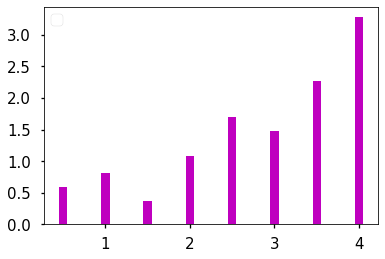

In [25]:
import matplotlib.pyplot as plt

plt.bar(secciones, masas_sec, width =0.1, color="m")
plt.legend()
#plt.grid()
plt.show()

In [26]:
# Escriba su código

masa = np.zeros(len(secciones1))
for i, ms in enumerate(masas_sec):
    masa[i+1] = masa[i] + ms
masa
print(masa)

[ 0.     0.595  1.401  1.77   2.848  4.552  6.027  8.29  11.572]


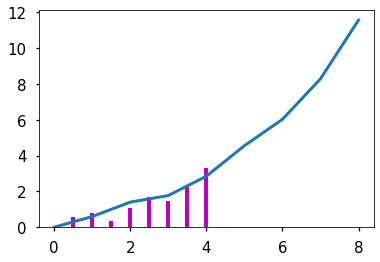

In [27]:
plt.bar(secciones, masas_sec, width =0.1, color="m")
plt.plot(masa)
#plt.legend()
#plt.grid()
plt.show()

In [28]:
# Escriba su código

#def sec(x):
 # return (x[i] - x[i-1])

#print(sec(x))
#e = sec(x)
sec = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
densidad = []
for i,j in enumerate(masas_sec):
  densidad.append(j /sec[i])

print(densidad)

[1.19, 1.612, 0.738, 2.156, 3.408, 2.95, 4.526, 6.564]


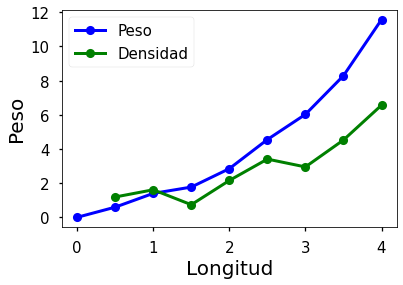

In [29]:
plt.plot(secciones1, masa, 'bo-', label = 'Peso')
plt.plot(secciones, densidad, 'go-', label = 'Densidad')
plt.ylabel('Peso')
plt.xlabel('Longitud')
plt.legend()
plt.show()

In [30]:
# Escriba su código
x = secciones
r = 0.01
A = np.pi*r**2
ror = []
def rho(x):
  return (1000*(x**2) + 5000 * np.sin(2*x)**2) * A

for i in x:
  ror.append(rho(i))
print(ror)

x1 = np.arange(0.0, 4, 0.01)
ror1 = []
def rho1(x1):
  return (1000*(x1**2) + 5000 * np.sin(2*x1)**2) * A

for i in x1:
  ror1.append(rho(i))
print(ror1)

[1.1907789408649767, 1.6129279280991666, 0.7381405307711528, 2.156310684160917, 3.4078988097868033, 2.9500702022640968, 4.526456003996436, 6.564090406147258]
[0.0, 0.0006596506859176761, 0.0026375977020719607, 0.005930827531518785, 0.010534323002953018, 0.016441071317112272, 0.02364207526575975, 0.03212636762529813, 0.04188102870198773, 0.05289120700070048, 0.065140142984144, 0.078609195884546, 0.0932778735249063, 0.10912386510210864, 0.12612307687944613, 0.1442496707314603, 0.16347610547943037, 0.1837731809513834, 0.20511008469614078, 0.22745444127666745, 0.25077236406386394, 0.27502850944794494, 0.30018613338067524, 0.32620715015800816, 0.35305219334908794, 0.38068067877414125, 0.4090508694305073, 0.438119942262939, 0.4678440566713551, 0.4981784246464502, 0.5290773824209536, 0.5604944635219161, 0.5923824731071556, 0.6246935634669352, 0.6573793105700934, 0.6903907915321625, 0.7236786628815487, 0.7571932394985607, 0.7908845741010003, 0.8247025371491618, 0.8585968970424002, 0.8925174004

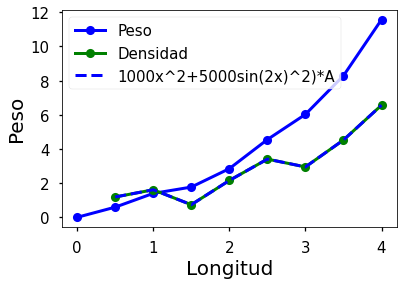

In [31]:
plt.plot(secciones1, masa, 'bo-', label = 'Peso')
plt.plot(secciones, densidad, 'go-', label = 'Densidad')
plt.plot(secciones, ror, 'b--', label = '1000x^2+5000sin(2x)^2)*A')
plt.ylabel('Peso')
plt.xlabel('Longitud')
plt.legend()
plt.show()

In [32]:
error_a = []
error_r = []

Ea = lambda e, a: np.fabs(e - a)
Er = lambda e, a: np.fabs(e - a) / np.fabs(e)

for i,j in enumerate(densidad):
  error_a.append(np.fabs(j - ror[i]))
  error_r.append(np.fabs((j - ror[i]) / np.fabs(j)))
#print(error_a)
#print(error_r)

import pandas as pd

df = pd.DataFrame(columns = ['Ea', 'Er'])
df = pd.DataFrame({'Er': error_r, 'Ea' : error_a})
print(df)

         Er        Ea
0  0.000655  0.000779
1  0.000576  0.000928
2  0.000190  0.000141
3  0.000144  0.000311
4  0.000030  0.000101
5  0.000024  0.000070
6  0.000101  0.000456
7  0.000014  0.000090


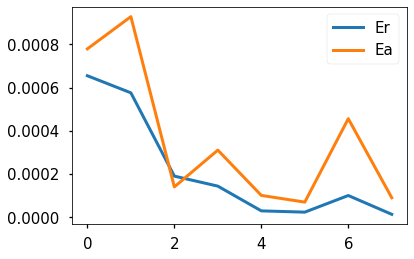

In [33]:
df.plot()

In [34]:
# Escriba su código

from sympy import Symbol, integrate, sin
y = Symbol('x')
integrate(1000 *y ** 2 + 5000* sin(2*y)**2, y)

1000*x**3/3 + 2500*x - 1250*sin(2*x)*cos(2*x)

In [35]:
"""
def integr (x):
  return (1000*x**3/3 + 2500*x - 1250*np.sin(2*x)*np.cos(2*x))
Calc = []
for i in x:
  Calc.append(integr(i))
print(Calc)

"""
calcMas = lambda x, A: ((1000*x**3)/3 + 2500*x - 1250*np.sin(2*x)*np.cos(2*x))*A
x = np.arange(0.5, 4.5, 0.5)
x_1 = np.arange(0.0, 4, 0.01)
m = calcMas(x_1, A)
#print(m)

No handles with labels found to put in legend.


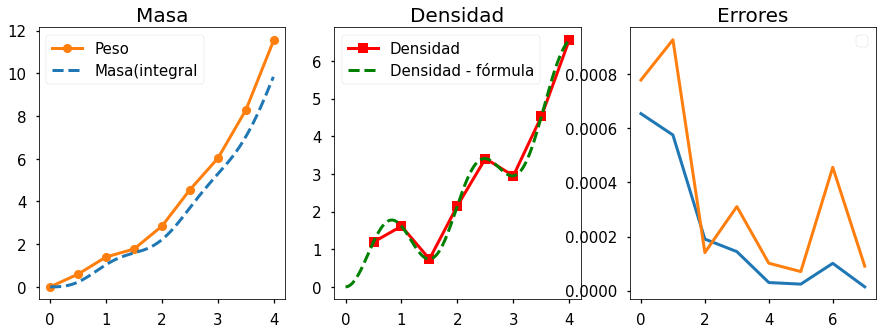

In [39]:
fig, axs = plt.subplots(1,3,figsize=(15,5))

axs[0].plot(secciones1, masa, 'C1o-', label = 'Peso')
axs[0].plot(x_1, m, 'C0--', label = 'Masa(integral')
axs[0].set_title('Masa')
axs[0].legend()

axs[1].plot(secciones, densidad, 'sr-', label = 'Densidad')
axs[1].plot(x_1, ror1, 'g--', label = 'Densidad - fórmula')
axs[1].set_title('Densidad')
axs[1].legend()

axs[2].plot(df)
axs[2].set_title('Errores')
axs[2].legend()

plt.show()
